# Testing Assumptions
## 1. State Assumptions

The following are our assumptions:
* Unmasked is independent of weighted number of  synapses
* Weighted number of synapses is independent of $X$ and $Y$
* Bins are i.i.d.
* Grid means are i.i.d.
* Class conditional difference between layers

## 2. Check Assumptions

For testing unmasked is independent of weighted number of synapses, check the off diagonal covariance is approximately 0 or use the scatter plo
t to see the trend.  
$\#\text{{weighted}} \perp\!\!\!\perp  \#\text{{unmasked}}$
  
For testing weighted number of sympses is independent of $X$ and $Y$, repeat the above steps.   
$\#\text{{weighted}} \perp\!\!\!\perp  X_i$  
$\#\text{{weighted}} \perp\!\!\!\perp  Y_i$

For testing bins and grid means are iid, check the off diagonal and optimal number of clusters.    
$u_i\overset{iid}{\sim}F$, where $u_i$ is the bins.  
$(u_1, u_2, ..., u_n) {\sim} F = \displaystyle\Pi_{i=1}^{n} F_i$
$ F_i = F_j, \forall i \neq j$  

$F = \Pi_{j = 1}^{J} F_j, J < n, \text{      } \Pi_{j=1}^{J}\omega_jF_j(\theta)$

For testing grid means are iid, repeat the above steps.  
$w_i\overset{iid}{\sim}F$, where $w_i$ is the grid means.  
$(w_1, w_2, ..., w_n) {\sim} F = \displaystyle\Pi_{i=1}^{n} F_i$
$ F_i = F_j, \forall i \neq j$  

$F = \Pi_{j = 1}^{J} F_j, J < n, \text{      } \Pi_{j=1}^{J}\omega_jF_j(\theta)$

For conditional differences between layers, fit the model using least squares regression and check the residual plot.  
$y = \beta x + \epsilon, \epsilon {\sim}Normal(\mu, \epsilon)$
$\|y - \beta x\| - \epsilon {\sim} Normal(\mu, \epsilon), p_1 \neq p_2$ 


In [1]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.mixture
import scipy.stats as ss
import seaborn as sns

np.random.seed(12345678)  # for reproducibility, set random seed

# Read in data
df = pd.read_csv('../output.csv')

nvox = 64*64*48 # assume number of voxels per bin
df['weighted'] = df['synapses']/df['unmasked']*nvox

### a. Bin data from Assignment 4
#### i. Independence assumption of unmasked vs. weighted data

#### ii. Independence assumption of weighted data

#### iii. Identically distributed assumption of weighted data

### b. Grid data from Assignment 5

In [2]:
import pickle

# Read labels
with open('Z_labels_update.pickle') as f:
    zvals, labels = pickle.load(f)

# Read grid means
with open('grid_data_update.pickle') as f:
    grid_means, grid_x, grid_y, grid_z = pickle.load(f)

#### i. Independence assumption of grid means and X,Y position

correlation between grid_means and grid_x:  0.122711094706 , p-value:  4.49060327067e-05
correlation between grid_means and grid_y:  -0.35524721728 , p-value:  4.60646490033e-34


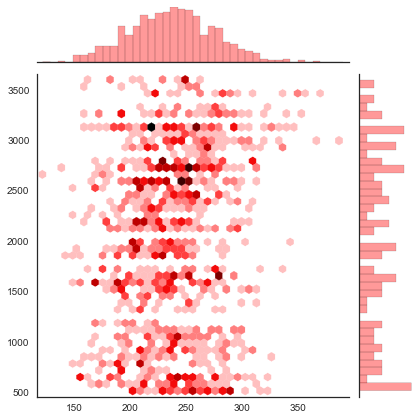

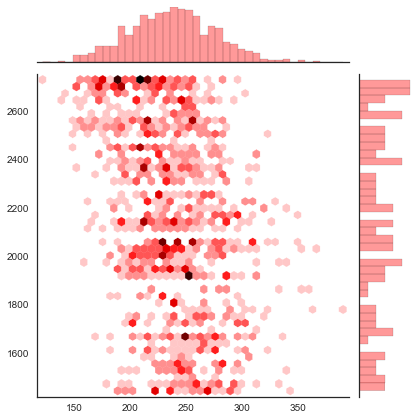

In [3]:
[corrX,pX]= ss.pearsonr(grid_means,grid_x)
print "correlation between grid_means and grid_x: ", corrX, ", p-value: ", pX

[corrY,pY]= ss.pearsonr(grid_means,grid_y)
print "correlation between grid_means and grid_y: ", corrY, ", p-value: ", pY

with sns.axes_style('white'):
    sns.jointplot(x=grid_means, y=np.array(grid_x).astype(np.float64), kind='hex', color='r', 
                  xlim=(np.min(grid_means)-0.02*np.ptp(grid_means),np.max(grid_means)+0.02*np.ptp(grid_means))  , 
                  ylim=(np.min(grid_x)-0.02*np.ptp(grid_x),np.max(grid_x)+0.02*np.ptp(grid_x)),
                  joint_kws={'gridsize':40}, marginal_kws={'bins':40}, stat_func=None);
    
with sns.axes_style('white'):
    sns.jointplot(x=grid_means, y=np.array(grid_y).astype(np.float64), kind='hex', color='r', 
                  xlim=(np.min(grid_means)-0.02*np.ptp(grid_means),np.max(grid_means)+0.02*np.ptp(grid_means)), 
                  ylim=(np.min(grid_y)-0.02*np.ptp(grid_y),np.max(grid_y)+0.02*np.ptp(grid_y)),
                  joint_kws={'gridsize':40}, marginal_kws={'bins':40}, stat_func=None);


    

The results show little-to-no correlation between grid_means and grid_x, 
However, grid_means and grid_y have a modest correlation, as the hex-plot confirms. This is surprising, as we assumed that there was no correlation in our previos analysis

#### ii. Independence assumption of grid means

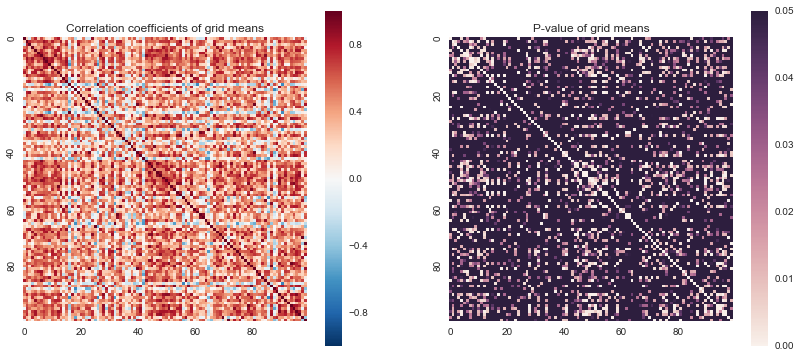

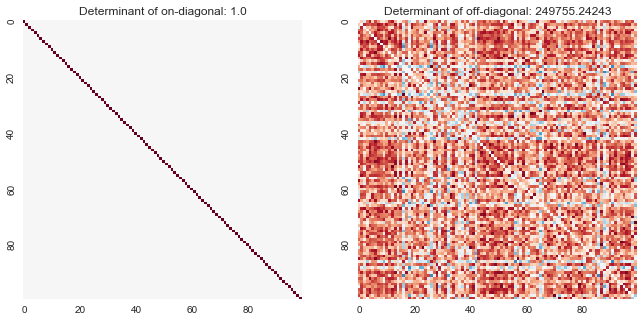

Ratio of on- and off-diagonal determinants: 4.00391995887e-06


In [4]:
out3 = np.array([grid_means[grid_z==z] for z in zvals], dtype=np.float64).T

import scipy.spatial.distance as dist

corr = np.corrcoef(out3)

# # Pearson's correlation coefficients
# corr = dist.squareform(dist.pdist(out, lambda x, y: ss.pearsonr(x, y)[0]))    

# p-values
pval = dist.squareform(dist.pdist(out3, lambda x, y: ss.pearsonr(x, y)[1]))

plt.figure(figsize=(14, 6))
plt.subplot(121)
# plt.figure(figsize=(7,7))
sns.heatmap(corr, square=True, xticklabels=20, yticklabels=20)
plt.title('Correlation coefficients of grid means')
plt.subplot(122)
sns.heatmap(pval, square=True, vmin=0, vmax=0.05, xticklabels=20, yticklabels=20)
plt.title('P-value of grid means')
plt.show()

diag = corr.diagonal() * np.eye(corr.shape[0])
hollow = corr - diag
d_det = np.linalg.det(diag)
h_det = np.linalg.det(hollow)

plt.figure(figsize=(11, 8))
plt.subplot(121)
sns.heatmap(diag, vmin=np.min(corr), vmax=np.max(corr), cbar=False, square=True, xticklabels=20, yticklabels=20)
plt.title('Determinant of on-diagonal: ' + str(d_det))
plt.subplot(122)
sns.heatmap(hollow, vmin=np.min(corr), vmax=np.max(corr), cbar=False, square=True, xticklabels=20, yticklabels=20)
plt.title('Determinant of off-diagonal: ' + str(h_det))
plt.show()

print "Ratio of on- and off-diagonal determinants: " + str(d_det / h_det)

The ratio of on- to off-diagonal correlations is very small. From this, we conclude that the grid means are not independent of one another, and that this assumption is false. However, as we can see above, the p-values are >0.05 for most off-diagonal correlations, indicating that these might not be very reliable.

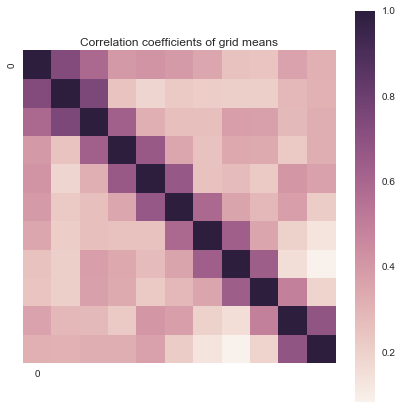

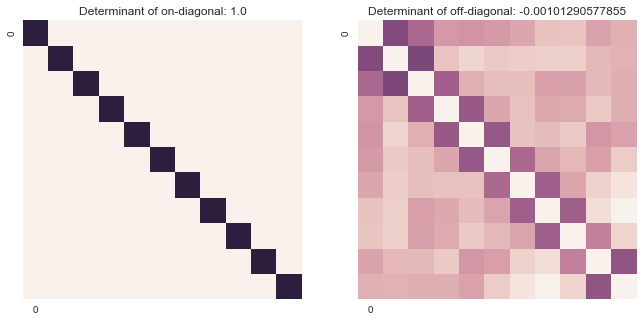

Ratio of on- and off-diagonal determinants: -987.258658386


In [5]:
corr = np.corrcoef(out3.T)

plt.figure(figsize=(7,7))
sns.heatmap(corr, square=True, xticklabels=20, yticklabels=20)
plt.title('Correlation coefficients of grid means')
plt.show()

diag = corr.diagonal() * np.eye(corr.shape[0])
hollow = corr - diag
d_det = np.linalg.det(diag)
h_det = np.linalg.det(hollow)

plt.figure(figsize=(11, 8))
plt.subplot(121)
sns.heatmap(diag, vmin=np.min(corr), vmax=np.max(corr), cbar=False, square=True, xticklabels=20, yticklabels=20)
plt.title('Determinant of on-diagonal: ' + str(d_det))
plt.subplot(122)
sns.heatmap(hollow, vmin=np.min(corr), vmax=np.max(corr), cbar=False, square=True, xticklabels=20, yticklabels=20)
plt.title('Determinant of off-diagonal: ' + str(h_det))
plt.show()

print "Ratio of on- and off-diagonal determinants: " + str(d_det / h_det)

From the above, we can conclude that the Z layers are independent of one another, as the ratio of on- to off-diagonal correlations is very large. This assumption is true.

#### iii. Identically distributed assumption of grid means

Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.
Fitting and evaluating model with 12 clusters.
Fitting and evaluating model with 13 clusters.
Fitting and evaluating model with 14 clusters.
Fitting and evaluating model with 15 clusters.


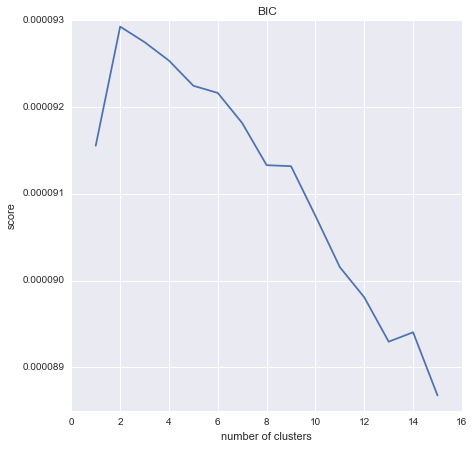

[ 10922.47248105  10761.24031262  10782.00228241  10806.8107284
  10840.74187251  10850.46905761  10891.50273147  10949.33890651
  10950.7231789   11019.83647349  11092.05093414  11134.92158059
  11198.66923979  11185.11731479  11276.86905918]


In [6]:
nclusters = range(1, 16)

bic = np.array(())
for idx in nclusters:
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = sklearn.mixture.GMM(n_components=idx, n_iter=1000, covariance_type = 'diag')
    gmm.fit(out3)
    bic = np.append(bic, gmm.bic(out3))
plt.figure(figsize=(7, 7))
plt.plot(nclusters, 1.0/bic)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.show()
print bic

Since the optimal number of clusters is 2, we conclude the grid means are not identical.

Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.


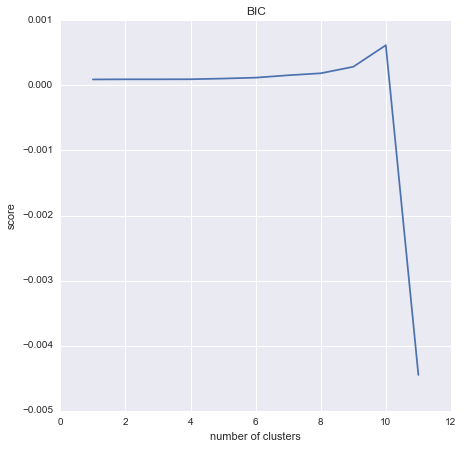

[ 11112.46590691  10855.16867563  10858.91214916  10738.42646491
   9649.03181336   8516.33983899   6490.52947568   5413.00656331
   3514.00905365   1624.70490951   -224.76363589]


In [7]:
nclusters = range(1, 12)

bic = np.array(())
for idx in nclusters:
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = sklearn.mixture.GMM(n_components=idx, n_iter=1000, covariance_type = 'diag')
    gmm.fit(out3.T)
    bic = np.append(bic, gmm.bic(out3.T))
plt.figure(figsize=(7, 7))
plt.plot(nclusters, 1.0/bic)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.show()
print bic

Since the optimal number of clusters is 10, we conclude the Z layers are not identical.

#### iv. Class conditional difference assumption between low-density vs. high-density Z layers

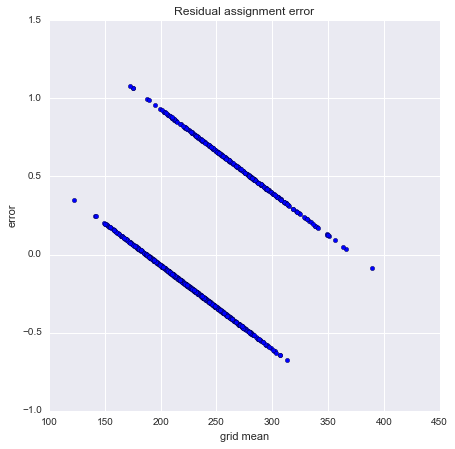

In [8]:
grid_labels = np.array([labels[zvals==z] for z in grid_z])

vals = ss.linregress(grid_means.reshape(-1,1).T, grid_labels.T)
m = vals[0]
c = vals[1]

def comp_value(m, c, data):
    return m.T*data + c

resi = np.array([y-comp_value(m, c, x) for x, y in zip(grid_means, grid_labels)])
    
plt.figure(figsize=(7,7))
plt.scatter(grid_means, resi)
plt.title('Residual assignment error')
plt.xlabel('grid mean')
plt.ylabel('error')
plt.show()

From the above results, we can see that our classifier fails to separate grids based on their mean, so this assumption is false.